<a href="https://colab.research.google.com/github/shemaaali/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/LS_DS_411_Text_Data_Assignment/SA1_LS_DS_421_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [172]:
# Dependencies for the week (instead of conda)
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2020-09-28 23:54:54--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt.4’

requirements.txt.4  100%[===================>]     137  --.-KB/s    in 0s      

2020-09-28 23:54:54 (6.82 MB/s) - ‘requirements.txt.4’ saved [137/137]



In [173]:
!python -m spacy download en_core_web_md  # Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [174]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [175]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


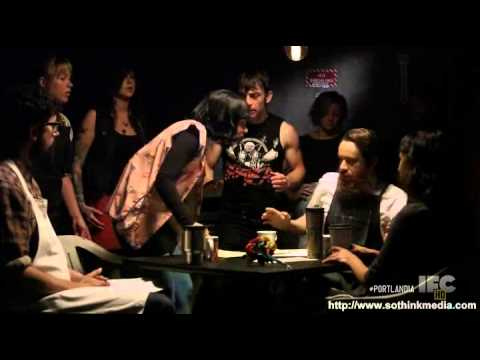

In [176]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [177]:
%pwd

'/content'

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
import squarify

In [138]:
# create a fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [179]:
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# Load the pre-trained statistical model for English
import en_core_web_lg
nlp = en_core_web_lg.load()

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [ ]:
# setting up natural language processor and tokenizer
#nlp = spacy.load('en_core_web_lg')

In [ ]:
# setting up tokenizer
#tokenizer = Tokenizer(nlp.vocab)

In [180]:
# creates stop words
STOPWORDS = nlp.Defaults.stop_words

In [181]:
# creates a function for removing stop words
def rm_stopwords(tkns):
    '''
    a function for removing stop words from a list of tokens
    '''
    tok_list = []
    for tok in tkns:
        if str(tok) not in STOPWORDS.union(' '):
            tok_list.append(tok)
            
    return(tok_list)

In [182]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [183]:
# copies dataframe to new df
df = shops.copy()

In [184]:
# renames columns for ease of use later
df.columns=['shop', 'text', 'rating']

In [185]:
# changes rating column to have only the number (still as a string)
df['rating'] = df['rating'].str[1:4]

In [186]:
# converts number string to float, then float to int
df['rating'] = df['rating'].astype(float)
df['rating'] = df['rating'].astype(int)

In [187]:
# creates a date column
df['date'] = df['text'].str.split(' ').apply(lambda x: x[1])

In [188]:
# converts data column to datetime dtype
df['date'] = df['date'].apply(pd.to_datetime)

In [189]:
# removes punctuation with regex given in lecture
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))

In [190]:
# changes text to be lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

In [191]:
# creates a new column with tokenized data using lecture function
df['tokens'] = df['text'].apply(tokenizer)

# takes every token past the date token
df['tokens'] = df['tokens'].apply(lambda x: x[2:])

df['tokens'] = df['tokens'].apply(lambda x: rm_stopwords(x))

# converts tokens to list of lemmas
df['tokens'] = df['tokens'].apply(lambda x: 
                [token.lemma_ for token in x])

# creates a counter for the tokens
df['counter'] = df['tokens'].apply(Counter)

In [192]:
df.head()

,shop,text,rating,date,tokens,counter
0,The Factory - Cafe With a Soul,11252016 1 checkin love love loved the atmosp...,5,2016-11-25,"[1, checkin, love, love, love, atmosphere, cor...","{'1': 1, 'checkin': 1, 'love': 3, 'atmosphere'..."
1,The Factory - Cafe With a Soul,1222016 listed in date night austin ambiance ...,4,2016-12-02,"[list, date, night, austin, ambiance, austin, ...","{'list': 1, 'date': 1, 'night': 1, 'austin': 2..."
2,The Factory - Cafe With a Soul,11302016 1 checkin listed in brunch spots i l...,4,2016-11-30,"[1, checkin, list, brunch, spot, love, eclecti...","{'1': 1, 'checkin': 1, 'list': 1, 'brunch': 2,..."
3,The Factory - Cafe With a Soul,11252016 very cool decor good drinks nice sea...,2,2016-11-25,"[cool, decor, good, drink, nice, seat, overpri...","{'cool': 1, 'decor': 1, 'good': 1, 'drink': 1,..."
4,The Factory - Cafe With a Soul,1232016 1 checkin they are located within the...,4,2016-12-03,"[1, checkin, locate, northcross, mall, shop, c...","{'1': 1, 'checkin': 1, 'locate': 1, 'northcros..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [193]:
# sums the rows into one counter
wordCount = df['counter'].sum()

In [194]:
# creates dataframes for good and bad ratings
dfGood = df[df['rating'] > 3]
dfBad = df[df['rating'] < 4]

# makes sure the size of the new dataframes add up to the size of the original dataframe
assert len(df) == len(dfGood) + len(dfBad)

In [195]:
# creates counters for good/bad reivews
wordCountGood = dfGood['counter'].sum()
wordCountBad = dfBad['counter'].sum()

In [196]:
# looks at top 10 words from all reviews using lecture function
# drops empty word
wordsDF = count(df['counter'])
wordsDF.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,coffee,4924,10593,1.0,0.028664,0.028664,0.646534
116,place,3888,6044,2.0,0.016355,0.045019,0.510504
153,good,2883,4154,3.0,0.011241,0.056260,0.378545
81,great,2853,3946,4.0,0.010678,0.066937,0.374606
148,like,2267,3364,5.0,0.009103,0.076040,0.297663
392,come,1935,2636,6.0,0.007133,0.083173,0.254070
457,time,1753,2380,7.0,0.006440,0.089613,0.230173
7,love,1819,2376,8.0,0.006429,0.096043,0.238839
34,drink,1651,2375,9.0,0.006427,0.102469,0.216780
17,shop,1669,2253,10.0,0.006097,0.108566,0.219144


In [197]:
# looks at top 10 words used in good reviews

wordsGoodDF = count(dfGood['counter'])
wordsGoodDF.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,coffee,3976,8421,1.0,0.029231,0.029231,0.647557
116,place,3133,4816,2.0,0.016717,0.045949,0.510261
81,great,2505,3474,3.0,0.012059,0.058008,0.407980
184,good,2279,3245,4.0,0.011264,0.069272,0.371173
177,like,1673,2423,5.0,0.008411,0.077682,0.272476
7,love,1608,2121,6.0,0.007362,0.085045,0.261889
375,come,1483,1986,7.0,0.006894,0.091939,0.241531
52,austin,1547,1969,8.0,0.006835,0.098774,0.251954
17,shop,1354,1820,9.0,0.006318,0.105091,0.220521
20,1,1713,1793,10.0,0.006224,0.111315,0.278990


In [198]:
# looks at top 10 words used in good reviews

wordsBadDF = count(dfBad['counter'])
wordsBadDF.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,coffee,948,2172,1.0,0.026660,0.026660,0.642276
30,place,755,1228,2.0,0.015073,0.041733,0.511518
17,like,594,941,3.0,0.011550,0.053283,0.402439
23,good,604,909,4.0,0.011157,0.064440,0.409214
115,order,443,780,5.0,0.009574,0.074014,0.300136
61,come,452,650,6.0,0.007978,0.081992,0.306233
189,time,422,614,7.0,0.007536,0.089529,0.285908
32,drink,365,613,8.0,0.007524,0.097053,0.247290
141,food,316,494,9.0,0.006064,0.103116,0.214092
79,great,348,472,10.0,0.005793,0.108910,0.235772


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [199]:
# creates dataframe for seeing difference in word use for good/bad review word useage

badDF = wordsBadDF[['word', 'appears_in_pct']]
badDF.columns = ['word', 'percentage_in_bad']

goodDF = wordsGoodDF[['word', 'appears_in_pct']]
goodDF.columns = ['word', 'percentage_in_good']

wordPercents = pd.merge(goodDF, badDF, on='word')

In [200]:
# creates a difference column
wordPercents['difference'] = wordPercents['percentage_in_good'] - wordPercents['percentage_in_bad']

In [201]:
# shows top 10 words used more in good reviews than bad reviews
wordPercents.sort_values('difference', ascending=False).head()

,word,percentage_in_good,percentage_in_bad,difference
2,great,0.407980,0.235772,0.172208
24,delicious,0.191857,0.056233,0.135624
5,love,0.261889,0.142954,0.118935
17,friendly,0.231270,0.122629,0.108642
7,austin,0.251954,0.163279,0.088675


In [202]:
# shows top 10 words used more in bad reviews than good reviews
wordPercents.sort_values('difference').head()

,word,percentage_in_good,percentage_in_bad,difference
22,order,0.167590,0.300136,-0.132546
4,like,0.272476,0.402439,-0.129963
269,okay,0.032899,0.145664,-0.112765
36,do,0.133876,0.238482,-0.104606
152,ask,0.050651,0.149051,-0.098400


In [203]:
# presentation data analysis
# I was not given a coffee shop to analyze so I picked one with a name I liked

# creating df with only 
tbc = df[df['shop'] == 'Thunderbird Coffee ']

tbc.head()

,shop,text,rating,date,tokens,counter
2888,Thunderbird Coffee,10262016 1 checkin after living in sf for man...,4,2016-10-26,"[1, checkin, live, sf, year, ive, develope, pr...","{'1': 1, 'checkin': 1, 'live': 1, 'sf': 1, 'ye..."
2889,Thunderbird Coffee,9172016 1 checkin i came a few minutes before...,4,2016-09-17,"[1, checkin, come, minute, close, host, happil...","{'1': 1, 'checkin': 1, 'come': 3, 'minute': 1,..."
2890,Thunderbird Coffee,962016 1 checkin easy to spot and is located ...,4,2016-09-06,"[1, checkin, easy, spot, locate, nice, little,...","{'1': 1, 'checkin': 1, 'easy': 1, 'spot': 5, '..."
2891,Thunderbird Coffee,1232016 plenty of seating limited selection o...,4,2016-12-03,"[plenty, seat, limit, selection, bake, good, a...","{'plenty': 1, 'seat': 2, 'limit': 1, 'selectio..."
2892,Thunderbird Coffee,6242016 updated review 1 checkin i love thund...,5,2016-06-24,"[update, review, 1, checkin, love, thunderbird...","{'update': 1, 'review': 1, '1': 1, 'checkin': ..."


In [204]:
# looking at basic data from the review tab

tbc['rating'].describe()

count    100.000000
mean       3.970000
std        0.999545
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

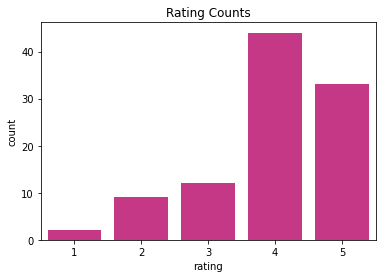

In [207]:
ratingCount = pd.DataFrame(tbc['rating'].value_counts()).reset_index()

ratingCount.columns = ['rating', 'count']

ratingCount.sort_values('rating')

sns.barplot(x=ratingCount['rating'], 
            y=ratingCount['count'], 
            color='#DC2087').set_title('Rating Counts')

plt.savefig('rating_counts.png')
plt.show();

In [208]:
# splits dataframe into three time periods to compare ratings over time

late = tbc[tbc['date'] >= '2016-2']

mid = tbc[(tbc['date'] < '2016-2') &
                (tbc['date'] >= '2015-5')]
                
early = tbc[tbc['date'] < '2015-5']

assert(len(late) + len(mid) + len(early) == len(tbc))

In [209]:
# gets average rating for time periods
earlyAVG = early['rating'].sum()/len(late)
midAVG = mid['rating'].sum()/len(late)
lateAVG = late['rating'].sum()/len(late)

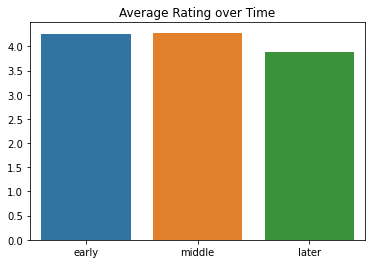

In [210]:
# plots the averages

avgs = [earlyAVG, midAVG, lateAVG]
labels = ['early', 
          'middle', 
          'later']

sns.barplot(x=labels, y=avgs).set_title('Average Rating over Time');
plt.savefig('avg_rating.png')
plt.show();

In [211]:
lateAVG

3.875

In [212]:
# creates dataframes for good and bad ratings
tbcGood = dfGood[dfGood['shop'] == 'Thunderbird Coffee ']
tbcBad = dfBad[dfBad['shop'] == 'Thunderbird Coffee ']

# makes sure the size of the new dataframes add up to the size of the original dataframe
assert len(tbc) == len(tbcGood) + len(tbcBad)

In [213]:
# looks at top 5 words from good reviews using lecture function

good_words = count(tbcGood['counter'])

good_words.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,coffee,61,121,1.0,0.030986,0.030986,0.792208
81,good,42,68,2.0,0.017414,0.048399,0.545455
89,place,40,65,3.0,0.016645,0.065045,0.519481
43,latte,28,48,4.0,0.012292,0.077337,0.363636
165,great,31,43,5.0,0.011012,0.088348,0.402597


In [214]:
# looks at top 5 words from bad reviews using lecture function

bad_words = count(tbcBad['counter'])

bad_words.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,coffee,20,41,1.0,0.029883,0.029883,0.869565
52,place,9,24,2.0,0.017493,0.047376,0.391304
98,order,10,19,3.0,0.013848,0.061224,0.434783
42,like,8,14,4.0,0.010204,0.071429,0.347826
94,im,8,13,5.0,0.009475,0.080904,0.347826


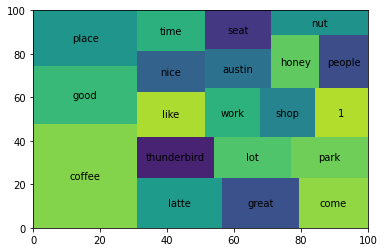

In [216]:
top20good = good_words[good_words['rank'] < 21]

squarify.plot(sizes=top20good['count'], label=top20good['word']);

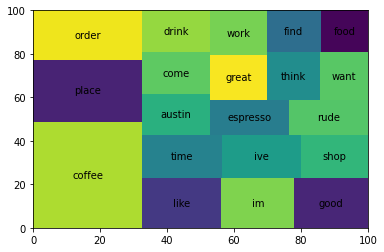

In [218]:
top20bad = bad_words[bad_words['rank'] < 21]

squarify.plot(sizes=top20bad['count'], label=top20bad['word']);

In [219]:
# creates dataframe for seeing difference in word use for good/bad review word useage
badDFtbc = bad_words[['word', 'appears_in_pct']]
badDFtbc.columns = ['word', 'percentage_in_bad']

goodDFtbc = good_words[['word', 'appears_in_pct']]
goodDFtbc.columns = ['word', 'percentage_in_good']

wordPercents_tbc = pd.merge(goodDFtbc, badDFtbc, on='word')

# creates a difference column
wordPercents_tbc['difference'] = wordPercents_tbc['percentage_in_good'] - wordPercents_tbc['percentage_in_bad']

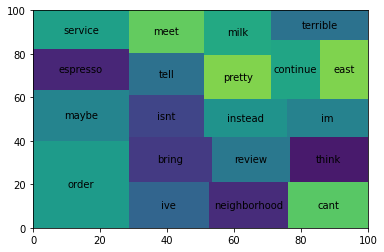

In [220]:
# shows top 20 words used more in bad reviews than good reviews
badPercents = wordPercents_tbc.sort_values('difference').head(20)

squarify.plot(sizes=badPercents['difference'].apply(abs), 
              label=badPercents['word'])

plt.savefig('bad.png')
plt.show()

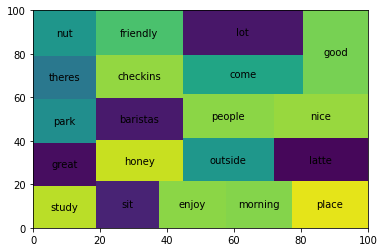

In [221]:
# shows top 10 words used more in bad reviews than good reviews
goodPercents = wordPercents_tbc.sort_values('difference').tail(20)

squarify.plot(sizes=goodPercents['difference'].apply(abs), 
              label=goodPercents['word'])

plt.savefig('good.png')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

